# **Business Understanding**
- This project is about `tn` and `tnmb` dataset on finding what makes a movie to be a success, by researching on genres, revenues, popularity and votes.
All this can help the company heads with deciding on which movie to produce.


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **First DataFrame**

In [2]:
#Load the dataset
df1=pd.read_csv('tn.movie_budgets.csv')

# **Data Understanding**
- Shape, column names
- Missing values
- Sample rows
- Basic statistics

### **Explore the Dataset**


In [3]:
#Views the bottom 5 rows
df1.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [4]:
#Structure of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#Stasticical summary of numeric columns
df1.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [6]:
#Names of columns
df1.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [7]:
#Shape of dataset
df1.shape

(5782, 6)

# **Data Preparation**
- Handling missing values

- Changing data types

- Renaming columns


### **Data Cleaning**

In [8]:
#Check missing values
df1.isnull()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [9]:
#fill missing values
df1.fillna(0,inplace=True)

In [10]:
#Check data type
df1.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [11]:
#Converting to a real date
df1['release_date']=pd.to_datetime(df1['release_date'])

In [12]:
df1['release_date'].dtype

dtype('<M8[ns]')

In [13]:
#Checking for duplicates
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [14]:
#Remove duplicates
df1.drop_duplicates(inplace=True)

In [15]:
#Clean names
df1.columns=df1.columns.str.strip().str.lower().str.replace('', '_') 
df1.columns = df1.columns.str.replace('_', '', regex=False)



In [16]:
#Save the cleaned dataset
df1.to_csv('tn.csv', index=False)

## **Second DataFrame**

In [17]:
#Load the dataset
df2=pd.read_csv('tmdb.movies.csv')

# **Data Understanding**
- Shape, column names
- Missing values
- Sample rows
- Basic statistics

### **Explore the Dataset**


In [18]:
#View top 5 rows
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
#View botttom 5 rows
df2.tail()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [20]:
#Structure of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
#Stasticical summary of numeric columns
df2.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [22]:
#Names of columns
df2.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [23]:
#Shape of dataset
df2.shape

(26517, 10)

# **Data Preparation**
- Handling missing values

- Changing data types

- Renaming columns
- concatenate `tn` and `tmdb`

### **Data Cleaning**

In [24]:
#Check missing values
df2.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [25]:
#Check data type
df2.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [26]:
#Converting to a real date
df2['release_date']=pd.to_datetime(df2['release_date'])

In [27]:
#Checking for duplicates
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

In [28]:
#Remove duplicates
df2.drop_duplicates(inplace=True)

In [29]:
#Clean names
df2.columns=df2.columns.str.strip().str.lower().str.replace('', '_')
df2.columns = df2.columns.str.replace('_', '', regex=False)


In [30]:
#Save the cleaned dataset
df2.to_csv('tmdb.csv', index=False)


## **Combined DataFrame**

In [31]:
#Load both datasets
tn = pd.read_csv('tn.csv')
tmdb = pd.read_csv('tmdb.csv')

In [32]:
#Combining datasets
to_concat = [tn, tmdb]
df3 = pd.concat(to_concat, ignore_index=True)
df3.to_csv("combined_movies.csv", index=False)


### **Data Cleaning**

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32299 entries, 0 to 32298
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                32299 non-null  int64  
 1   releasedate       32299 non-null  object 
 2   movie             5782 non-null   object 
 3   productionbudget  5782 non-null   object 
 4   domesticgross     5782 non-null   object 
 5   worldwidegross    5782 non-null   object 
 6   unnamed: 0        26517 non-null  float64
 7   genreids          26517 non-null  object 
 8   originallanguage  26517 non-null  object 
 9   originaltitle     26517 non-null  object 
 10  popularity        26517 non-null  float64
 11  title             26517 non-null  object 
 12  voteaverage       26517 non-null  float64
 13  votecount         26517 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 3.5+ MB


In [34]:
#clean names
df3.columns=df3.columns.str.strip().str.lower().str.replace('', '_')
df3.columns = df3.columns.str.replace('_', '', regex=False)


In [35]:
#check missing values
df3.isnull()

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,unnamed: 0,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount
0,False,False,False,False,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32294,False,False,True,True,True,True,False,False,False,False,False,False,False,False
32295,False,False,True,True,True,True,False,False,False,False,False,False,False,False
32296,False,False,True,True,True,True,False,False,False,False,False,False,False,False
32297,False,False,True,True,True,True,False,False,False,False,False,False,False,False


In [36]:
# Percentage of missing values
df3.isnull().mean() * 100


id                   0.000000
releasedate          0.000000
movie               82.098517
productionbudget    82.098517
domesticgross       82.098517
worldwidegross      82.098517
unnamed: 0          17.901483
genreids            17.901483
originallanguage    17.901483
originaltitle       17.901483
popularity          17.901483
title               17.901483
voteaverage         17.901483
votecount           17.901483
dtype: float64

In [37]:
#check missing values
df3.isnull()

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,unnamed: 0,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount
0,False,False,False,False,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32294,False,False,True,True,True,True,False,False,False,False,False,False,False,False
32295,False,False,True,True,True,True,False,False,False,False,False,False,False,False
32296,False,False,True,True,True,True,False,False,False,False,False,False,False,False
32297,False,False,True,True,True,True,False,False,False,False,False,False,False,False


In [38]:
#Fill missing values
df3.fillna(0, inplace=True)  # for text columns
df3.isnull()

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,unnamed: 0,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32295,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32297,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
df3.isnull()

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,unnamed: 0,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32295,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32297,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
#check duplicates
df3.duplicated

<bound method DataFrame.duplicated of            id releasedate                                        movie  \
0           1  2009-12-18                                       Avatar   
1           2  2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2           3  2019-06-07                                 Dark Phoenix   
3           4  2015-05-01                      Avengers: Age of Ultron   
4           5  2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...       ...         ...                                          ...   
32294  488143  2018-10-13                                            0   
32295  485975  2018-05-01                                            0   
32296  381231  2018-10-01                                            0   
32297  366854  2018-06-22                                            0   
32298  309885  2018-10-05                                            0   

      productionbudget domesticgross  worldwidegross  unnamed: 0  \
0    

In [41]:
#remove duplicates
df3.drop_duplicates(inplace=True)
df3.duplicated

<bound method DataFrame.duplicated of            id releasedate                                        movie  \
0           1  2009-12-18                                       Avatar   
1           2  2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2           3  2019-06-07                                 Dark Phoenix   
3           4  2015-05-01                      Avengers: Age of Ultron   
4           5  2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...       ...         ...                                          ...   
32294  488143  2018-10-13                                            0   
32295  485975  2018-05-01                                            0   
32296  381231  2018-10-01                                            0   
32297  366854  2018-06-22                                            0   
32298  309885  2018-10-05                                            0   

      productionbudget domesticgross  worldwidegross  unnamed: 0  \
0    

In [42]:
# Drop unnamed index columns or redundant metadata
df3.drop(columns=[col for col in df3.columns if 'unnamed' in col], inplace=True)


In [43]:
df3.head()

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",0,0,0,0.0,0,0.0,0.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",0,0,0,0.0,0,0.0,0.0
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",0,0,0,0.0,0,0.0,0.0
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",0,0,0,0.0,0,0.0,0.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",0,0,0,0.0,0,0.0,0.0


In [44]:
df3.tail()

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount
32294,488143,2018-10-13,0,0,0,0,"[27, 18]",en,Laboratory Conditions,0.6,Laboratory Conditions,0.0,1.0
32295,485975,2018-05-01,0,0,0,0,"[18, 53]",en,_EXHIBIT_84xxx_,0.6,_EXHIBIT_84xxx_,0.0,1.0
32296,381231,2018-10-01,0,0,0,0,"[14, 28, 12]",en,The Last One,0.6,The Last One,0.0,1.0
32297,366854,2018-06-22,0,0,0,0,"[10751, 12, 28]",en,Trailer Made,0.6,Trailer Made,0.0,1.0
32298,309885,2018-10-05,0,0,0,0,"[53, 27]",en,The Church,0.6,The Church,0.0,1.0


In [45]:
df3.columns


Index(['id', 'releasedate', 'movie', 'productionbudget', 'domesticgross',
       'worldwidegross', 'genreids', 'originallanguage', 'originaltitle',
       'popularity', 'title', 'voteaverage', 'votecount'],
      dtype='object')

# **Data Analysis**
Show filtering, grouping, sorting, and aggregations.eg:
- What are the top 5 most voted movies?
- What are the top 10 movies by worldwide profit

## **Data Manipulation and Analysis**

In [46]:
#Create profit column

df3['domesticgross'] = pd.to_numeric(df3['domesticgross'], errors='coerce')
df3['worldwidegross'] = pd.to_numeric(df3['worldwidegross'], errors='coerce')
df3['productionbudget'] = pd.to_numeric(df3['productionbudget'], errors='coerce')

df3['domestic_profit'] = df3['domesticgross'] - df3['productionbudget']
df3['worldwide_profit'] = df3['worldwidegross'] - df3['productionbudget']

In [47]:
#Top 10 movies by worldwide profit
df3.sort_values('worldwide_profit', ascending=False)[['title', 'worldwide_profit']]


,title,worldwide_profit
5782,Harry Potter and the Deathly Hallows: Part 1,0.0
23457,The Monster,0.0
23467,The Duel,0.0
23466,A Wish for Christmas,0.0
23465,Ratchet & Clank,0.0
...,...,...
5777,0,NaN
5778,0,NaN
5779,0,NaN
5780,0,NaN


In [48]:
#top languages by movie count
df3['originallanguage'].value_counts().head(10)


originallanguage
en    23291
0      5782
fr      507
es      455
ru      298
ja      265
de      237
zh      177
hi      172
it      123
Name: count, dtype: int64

In [49]:
#Top 5 rated movies
df3[pd.to_numeric(df3['votecount'], errors='coerce') >= 100].sort_values('voteaverage', ascending=False)[['title', 'voteaverage']].head()

,title,voteaverage
23171,Your Name.,8.6
20493,Human,8.6
26414,Your Name.,8.6
29643,Schindler's List,8.5
19955,Spirited Away,8.5


In [50]:
#Group per year average budget and gross
df3.groupby('releasedate')[['productionbudget', 'worldwidegross']].mean()


,productionbudget,worldwidegross
releasedate,,
1915-02-08,NaN,NaN
1916-09-05,NaN,NaN
1916-12-24,NaN,NaN
1920-09-17,NaN,NaN
1925-11-19,NaN,NaN
...,...,...
2019-11-22,NaN,NaN
2019-12-31,NaN,NaN
2020-02-21,NaN,NaN


In [51]:
#Popular and high rated movies
df3['popularity'] = pd.to_numeric(df3['popularity'], errors='coerce')
df3['voteaverage'] = pd.to_numeric(df3['voteaverage'], errors='coerce')
popular_high_rated = df3[(df3['popularity'] > 30) & (df3['voteaverage'] >= 8)]
popular_high_rated

,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount,domestic_profit,worldwide_profit
16808,205596,2014-12-19,0,0.0,0.0,0.0,"[36, 18, 53, 10752]",en,The Imitation Game,33.078,The Imitation Game,8.1,10396.0,0.0,0.0
19955,129,2002-09-20,0,0.0,0.0,0.0,"[16, 10751, 14]",ja,千と千尋の神隠し,32.043,Spirited Away,8.5,7424.0,0.0,0.0
26408,129,2002-09-20,0,0.0,0.0,0.0,"[16, 10751, 14]",ja,千と千尋の神隠し,32.043,Spirited Away,8.5,7424.0,0.0,0.0
29593,299536,2018-04-27,0,0.0,0.0,0.0,"[12, 28, 14]",en,Avengers: Infinity War,80.773,Avengers: Infinity War,8.3,13948.0,0.0,0.0
29594,324857,2018-12-14,0,0.0,0.0,0.0,"[28, 12, 16, 878, 35]",en,Spider-Man: Into the Spider-Verse,60.534,Spider-Man: Into the Spider-Verse,8.4,4048.0,0.0,0.0
29607,424694,2018-11-02,0,0.0,0.0,0.0,"[18, 10402]",en,Bohemian Rhapsody,37.197,Bohemian Rhapsody,8.1,7629.0,0.0,0.0
29609,490132,2018-11-16,0,0.0,0.0,0.0,"[18, 35]",en,Green Book,36.284,Green Book,8.3,3499.0,0.0,0.0


In [52]:
#sorting data by popularity
df3.sort_values('popularity', ascending=False).head(10)


,id,releasedate,movie,productionbudget,domesticgross,worldwidegross,genreids,originallanguage,originaltitle,popularity,title,voteaverage,votecount,domestic_profit,worldwide_profit
29593,299536,2018-04-27,0,0.0,0.0,0.0,"[12, 28, 14]",en,Avengers: Infinity War,80.773,Avengers: Infinity War,8.3,13948.0,0.0,0.0
16801,245891,2014-10-24,0,0.0,0.0,0.0,"[28, 53]",en,John Wick,78.123,John Wick,7.2,10081.0,0.0,0.0
29594,324857,2018-12-14,0,0.0,0.0,0.0,"[28, 12, 16, 878, 35]",en,Spider-Man: Into the Spider-Verse,60.534,Spider-Man: Into the Spider-Verse,8.4,4048.0,0.0,0.0
16802,122917,2014-12-17,0,0.0,0.0,0.0,"[28, 12, 14]",en,The Hobbit: The Battle of the Five Armies,53.783,The Hobbit: The Battle of the Five Armies,7.3,8392.0,0.0,0.0
10961,24428,2012-05-04,0,0.0,0.0,0.0,"[878, 28, 12]",en,The Avengers,50.289,The Avengers,7.6,19673.0,0.0,0.0
16803,118340,2014-08-01,0,0.0,0.0,0.0,"[28, 878, 12]",en,Guardians of the Galaxy,49.606,Guardians of the Galaxy,7.9,17958.0,0.0,0.0
29595,335984,2017-10-06,0,0.0,0.0,0.0,"[878, 28, 53]",en,Blade Runner 2049,48.571,Blade Runner 2049,7.4,6679.0,0.0,0.0
26399,335984,2017-10-06,0,0.0,0.0,0.0,"[878, 28, 53]",en,Blade Runner 2049,48.571,Blade Runner 2049,7.4,6679.0,0.0,0.0
29596,338952,2018-11-16,0,0.0,0.0,0.0,[12],en,Fantastic Beasts: The Crimes of Grindelwald,48.508,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870.0,0.0,0.0
29597,404368,2018-11-21,0,0.0,0.0,0.0,"[10751, 16, 35, 14, 12]",en,Ralph Breaks the Internet,48.057,Ralph Breaks the Internet,7.2,2626.0,0.0,0.0


In [53]:
#Average vote per year
df3.groupby('releasedate')['voteaverage'].mean().sort_index().tail(20)


releasedate
2019-05-10    0.00
2019-05-17    3.44
2019-05-24    0.00
2019-05-31    0.00
2019-06-07    0.00
2019-06-14    0.00
2019-06-21    0.00
2019-06-28    0.00
2019-07-12    0.00
2019-08-14    0.00
2019-08-30    0.00
2019-09-13    0.00
2019-09-20    0.00
2019-09-30    0.00
2019-11-08    0.00
2019-11-22    0.00
2019-12-31    0.00
2020-02-21    0.00
2020-12-25    0.00
2020-12-31    0.00
Name: voteaverage, dtype: float64

## **Data Visualization**

### 1. Bar Graph

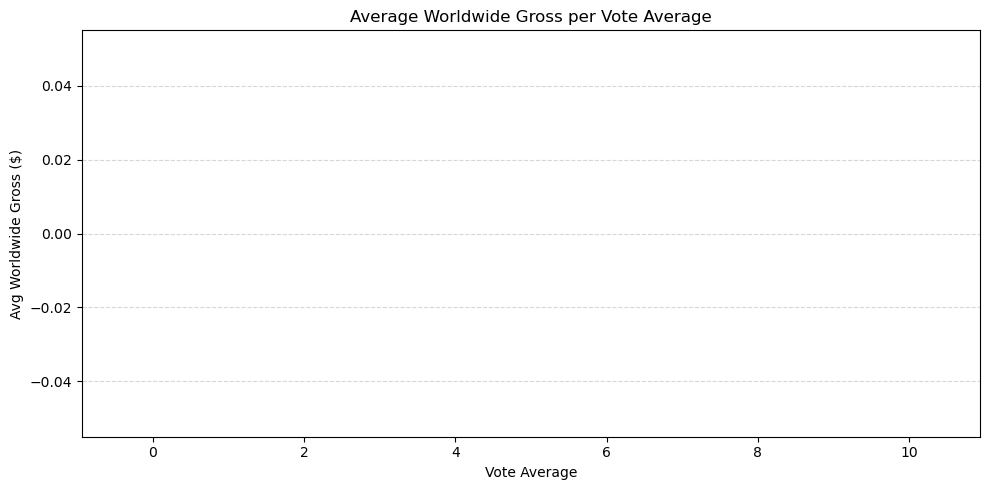

In [77]:
df3['voteaverage'] = pd.to_numeric(df3['voteaverage'], errors='coerce')
df3['worldwidegross'] = pd.to_numeric(df3['worldwidegross'], errors='coerce')

grouped = df3.groupby('voteaverage')['worldwidegross'].mean().dropna()

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(grouped.index, grouped.values, color='lightblue')
plt.title('Average Worldwide Gross per Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Avg Worldwide Gross ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 1. Horizontal Bar

It shows the vote count from lowest to highest in each movie.

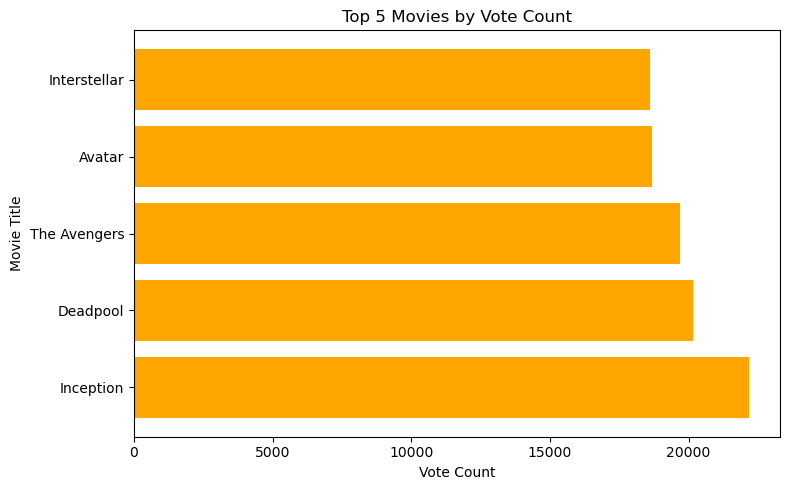

In [124]:
#Horizontal bar for popular movies
df3['votecount'] = pd.to_numeric(df3['votecount'], errors='coerce')

top5 = df3.sort_values(by='votecount', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.barh(top5['originaltitle'], top5['votecount'], color='orange')
plt.title('Top 5 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()


### 2.Scatter Plot

It show the rating of movies in the number of votes 

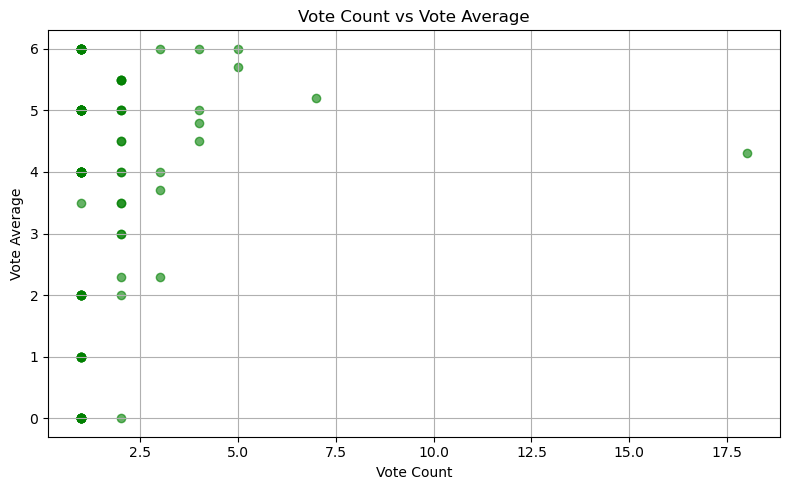

In [132]:
#Scatter plot for popularity in vote count
df_clean = df3[['votecount', 'voteaverage']].dropna()
df_sample = df_clean.tail(100)

plt.figure(figsize=(8, 5))
plt.scatter(df_sample['votecount'], df_sample['voteaverage'], alpha=0.6, color='green')
plt.title('Vote Count vs Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Box Plot

It shows distribution for movie popularity in my dataframe

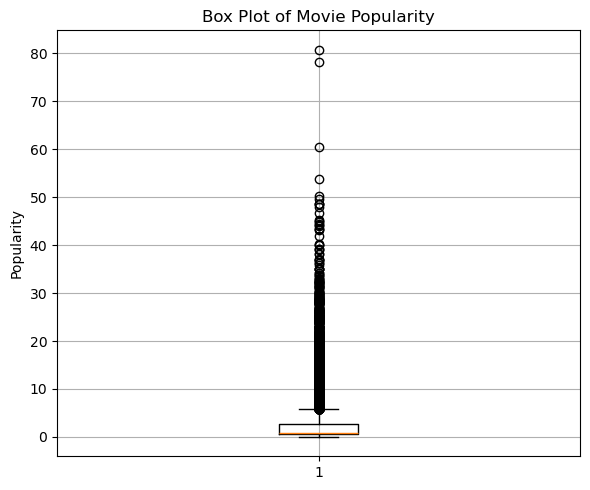

In [149]:
#Box plot for movie popularity
popularity_clean = df3['popularity'].dropna()
popularity_sample = popularity_clean.head(10)

plt.figure(figsize=(6, 5))
plt.boxplot(popularity_clean)
plt.title('Box Plot of Movie Popularity')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4. Line Graph

it shows popularity of movies per year

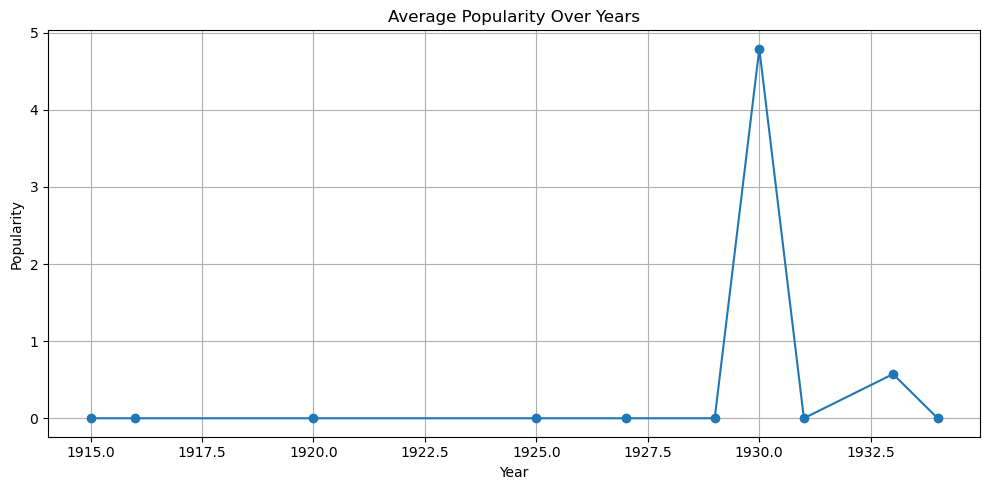

In [138]:
#Line graph for movie popularity in each year
df3['releasedate'] = pd.to_datetime(df3['releasedate'], errors='coerce')
df3['release_year'] = df3['releasedate'].dt.year

pop_by_year = df3.groupby('release_year')['popularity'].mean().dropna().head(10)

plt.figure(figsize=(10, 5))
plt.plot(pop_by_year.index, pop_by_year.values, marker='o')
plt.title('Average Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity'
plt.grid(True)
plt.tight_layout()
plt.show()



### 5.Histogram
It shows how many movies are popular

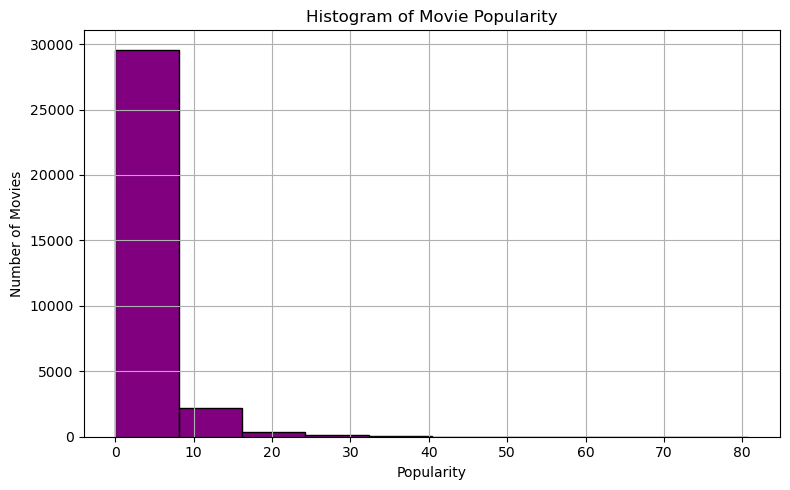

In [153]:
#Histogram for movie popularity
plt.figure(figsize=(8, 5))
plt.hist(df3['popularity'].dropna(), bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Business Understanding**
- The studio should focus on the movie genre and see which movies get more vote count
- It`s imporntant to not focus on movie popularity but also attention catching and trendy movies
- Plan when to release a movie depending with the right season
- Marketing and advertising the movie for its popularity

# **Conclusion**
- Many movie are not popular
- Many popular movie dont have high ratings
- Popularity goes together with vote count
  